Data downloaded at [link](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Smarket.csv)

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import feature_selection
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'Smarket.csv'

In [3]:
X = pd.read_csv(fname, index_col=0)

In [4]:
X.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


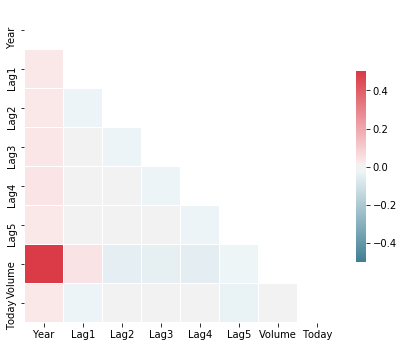

In [5]:
Y = X.iloc[:, :-1].corr()
plt.figure(figsize = (7, 7))
# Generate a mask for the upper triangle
mask = np.zeros_like(Y, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Y, mask=mask, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5})

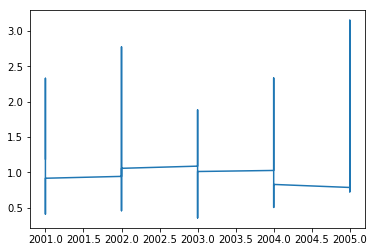

In [6]:
plt.plot(X['Year'], X['Volume'])
plt.show()

Fit a logistic regression on the predictors (excluding Year & Today) to predict Direction (if Today > 0, Direction = Up)

In [7]:
y = X.Direction.copy()
y = y.map({'Up': 1, 'Down': 0})

In [8]:
x = X.iloc[:, 1:-2] # this is what's being used in ISLR7
Nrows, Ncols = x.shape

In [9]:
model = LogisticRegression().fit(x, y)

In [10]:
# print the results (coefs) & basic statistics
fcoefs = ['intercept'] + list(x.columns)
coefs = list(model.intercept_) + list(model.coef_.reshape(Ncols))
# p & F values
F, pval = feature_selection.f_regression(x, y)
# print
print('\t\t', 'Coefficients', '\t', 'P-val')
for i in range(Ncols + 1):
    if i == 0:
        print(fcoefs[i], '\t', '{0:.4f}'.format(coefs[i]))
    else:
        print(fcoefs[i], '\t\t', '{0:.4f}'.format(coefs[i]), '\t', '{0:.4f}'.format(pval[i - 1]))

		 Coefficients 	 P-val
intercept 	 -0.1145
Lag1 		 -0.0728 	 0.1601
Lag2 		 -0.0423 	 0.3949
Lag3 		 0.0110 	 0.8285
Lag4 		 0.0092 	 0.8816
Lag5 		 0.0102 	 0.8481
Volume 		 0.1279 	 0.4175


by default, class weight = 1, prob = 0.5 is the decision boundary

In [11]:
y2 = model.predict(x)
print('Prediction of 1st 10 elements: ', y2[:10])

Prediction of 1st 10 elements:  [1 0 0 1 1 1 0 1 1 0]


In [12]:
print('Predicted probability for Up: \n', model.predict_proba(x.iloc[:10, :])[:, 1]) # 2nd column corresponds to probability of Y = 1

Predicted probability for Up: 
 [0.50775596 0.48208765 0.48147908 0.51561031 0.51134987 0.50726931
 0.49288388 0.50941118 0.51822893 0.48944035]


check the confusion matrix and prediction accuracy

In [13]:
metricC = confusion_matrix(y, y2)

In [14]:
print('true negatives: ', metricC[0, 0], '\t false negatives: ', metricC[1, 0])
print('false positives: ', metricC[0, 1], '\t true positives: ', metricC[1, 1])

true negatives:  143 	 false negatives:  135
false positives:  459 	 true positives:  513


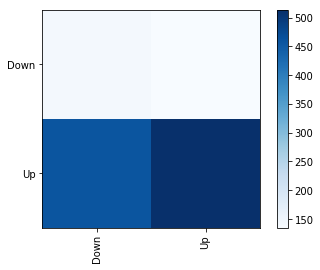

In [15]:
# show the confusion matrix
plt.imshow(metricC.T, cmap = plt.cm.Blues)
columns = ['Down', 'Up']
plt.xticks([0, 1], columns, rotation = 'vertical')
plt.yticks([0, 1], columns)
plt.colorbar()
plt.show()

In [16]:
# % of correctly predicted - training data
(metricC[0, 0] + metricC[1, 1]) / len(y)

0.5248

In [17]:
# split into training (before 2005) and testing sets
xtrain = X[X.Year < 2005].iloc[:, 1:-2]
ytrain = X[X.Year < 2005].Direction.map({'Up': 1, 'Down': 0})
xtest  = X[X.Year >= 2005].iloc[:, 1:-2]
ytest  = X[X.Year >= 2005].Direction.map({'Up': 1, 'Down': 0})

In [18]:
model = LogisticRegression().fit(xtrain, ytrain)
ytest2 = model.predict(xtest)
metricC = confusion_matrix(ytest, ytest2)

In [19]:
# % of correctly predicted - testing data
(metricC[0, 0] + metricC[1, 1]) / len(ytest)

0.4880952380952381

re-fit the model: using only Lag1 & Lag2 (smallest p-values)

In [20]:
# split into training (before 2005) and testing sets
xtrain = X[X.Year < 2005][['Lag1', 'Lag2']]
ytrain = X[X.Year < 2005].Direction.map({'Up': 1, 'Down': 0})
xtest  = X[X.Year >= 2005][['Lag1', 'Lag2']]
ytest  = X[X.Year >= 2005].Direction.map({'Up': 1, 'Down': 0})

In [21]:
model = LogisticRegression().fit(xtrain, ytrain)
ytest2 = model.predict(xtest)
metricC = confusion_matrix(ytest, ytest2)

In [22]:
# % of correctly predicted - testing data
(metricC[0, 0] + metricC[1, 1]) / len(ytest)

0.5595238095238095

In [23]:
# % of 'Up' is the same!
len(ytest[ytest == 1]) / len(ytest)

0.5595238095238095

In [24]:
# % of true positives / positive (Up)
metricC[1, 1] / sum(metricC[:, 1])

0.5824175824175825

prediction (Up) using giving values of inputs (lag1, lag2)

In [25]:
model.predict_proba([[1.2, 1.1], [1.5, -0.8]])[:, 1]

array([0.47919291, 0.49609392])